In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
import random
warnings.filterwarnings('ignore')
random.seed(2019)
np.random.seed(2019)

In [2]:
# from google.colab import files
# files.upload()

In [3]:
!unzip new-york-city-airbnb-open-data.zip

'unzip' 不是內部或外部命令、可執行的程式或批次檔。


In [4]:
df = pd.read_csv("AB_NYC_2019.csv")

In [5]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [6]:
df["last_review"] = pd.to_datetime(df["last_review"], infer_datetime_format=True)
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)
earliest = min(df["last_review"])
df["last_review"] = df["last_review"].fillna(earliest)
df["last_review"] = df["last_review"].apply(lambda x: x.toordinal() - earliest.toordinal())
df

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
4      -73.94399  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

       last_review  reviews_per_month  calculated_host_listings_count  \
0             2762               0.21                               6   
1             2976               0.38                               2   
2                0               0.00                               1   
3             3021               4.64                               1   
4             2793               0.10                               1   
...            ...                ...                             ...   
48890            0               0.00                               2   
48891            0               0.00                               2   
48892            0               0.00                               1   
48893            0               0.00                               6   
48894            0               0.00                               1   

       availability_365  
0                   365  
1                   355  
2                   365  
3                   194  
4                     0  
...                 ...  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23  

[48895 rows x 16 columns

In [7]:
df["price"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

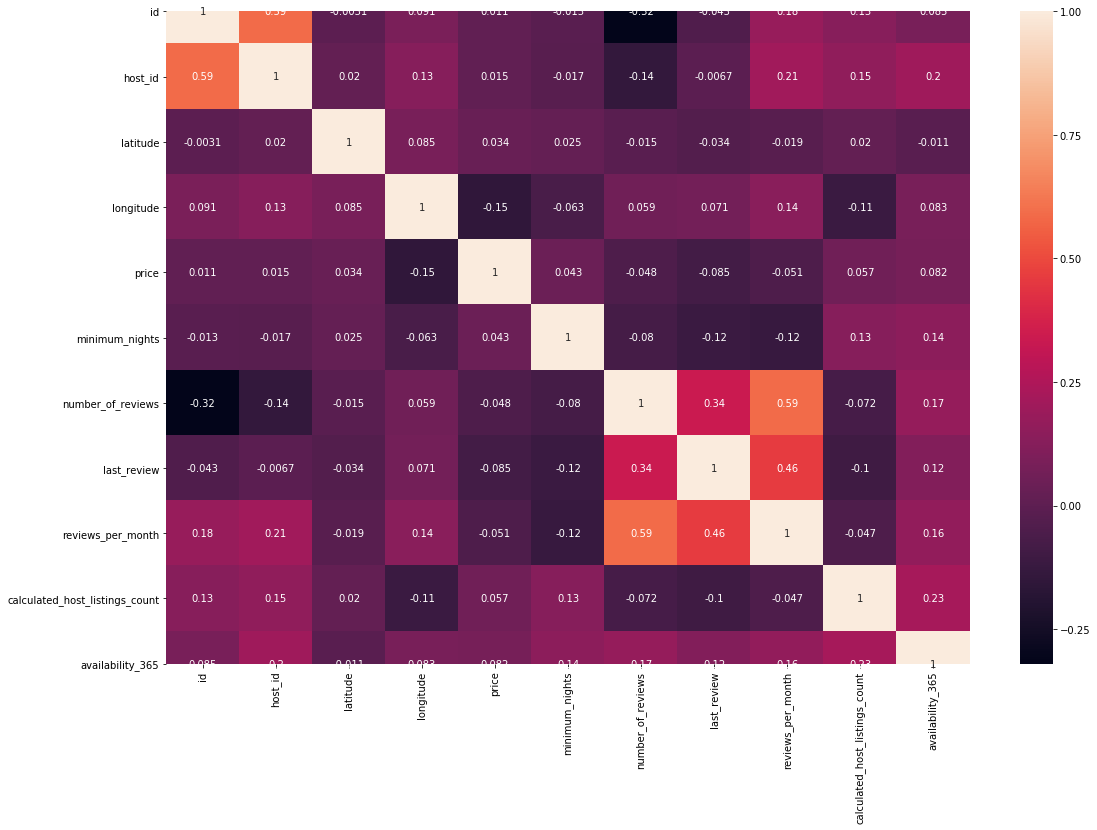

In [8]:
corr = df.corr()
plt.figure(figsize=(18, 12))
sns.heatmap(corr, annot=True)

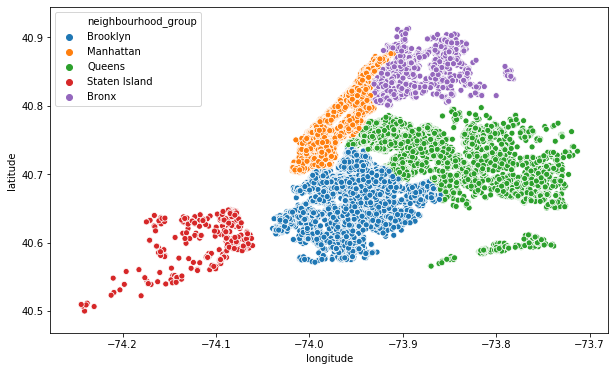

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(df.longitude, df.latitude, hue=df.neighbourhood_group)
plt.ioff()

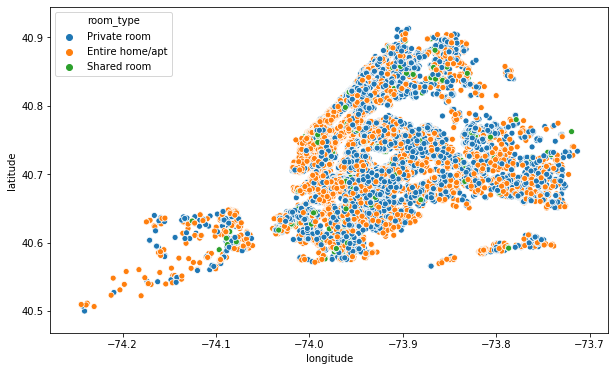

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(df.longitude, df.latitude, hue=df.room_type)
plt.ioff()

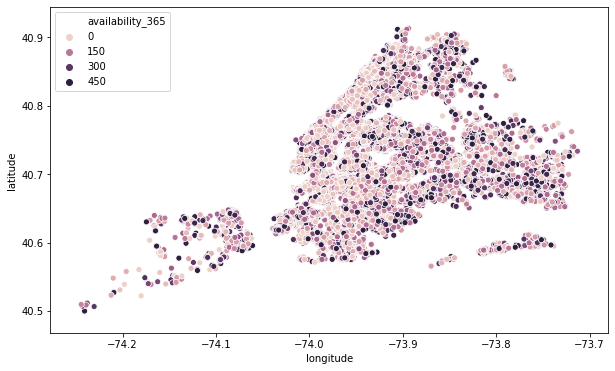

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(df.longitude, df.latitude, hue=df.availability_365)
plt.ioff()

In [12]:
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews   last_review  reviews_per_month  \
count    48895.000000       48895.000000  48895.000000       48895.000000   
mean         7.029962          23.274466   2182.321669           1.090910   
std         20.510550          44.550582   1169.872743           1.597283   
min          1.000000           0.000000      0.000000           0.000000   
25%          1.000000           1.000000   1823.000000           0.040000   
50%          3.000000           5.000000   2838.000000           0.370000   
75%          5.000000          24.000000   3005.000000           1.580000   
max       1250.000000         629.000000   3024.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

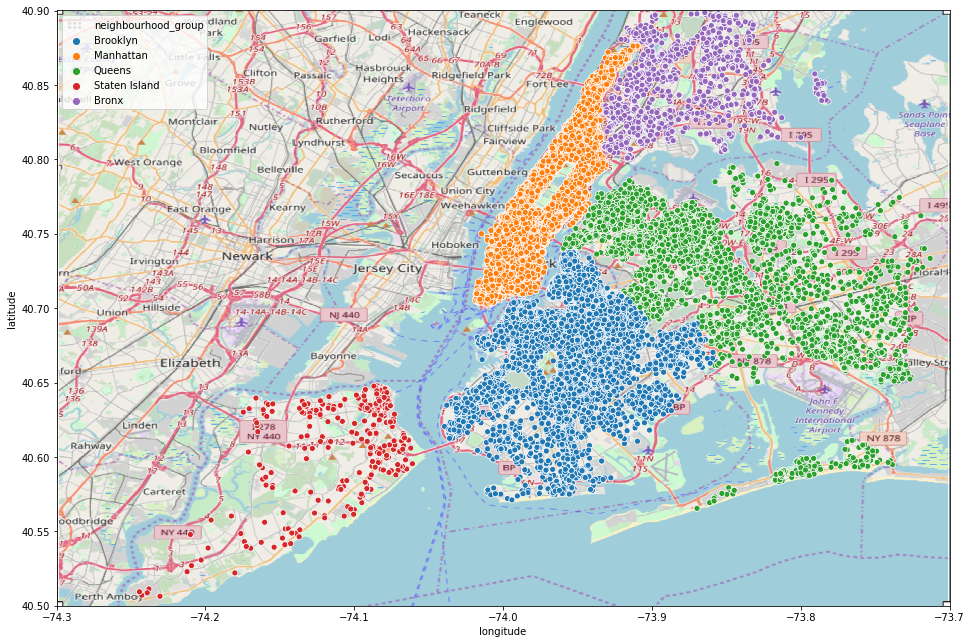

In [13]:
nyc_map = plt.imread('https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png')
bounding_box = (-74.3, -73.7, 40.5, 40.9)
plt.figure(figsize=(16, 16))
plt.imshow(nyc_map, zorder=0, extent=bounding_box)
drop = (df["latitude"] >= 40.8995) | (df["latitude"] <= 40.500001)
sns.scatterplot(df[~drop].longitude, df[~drop].latitude, hue=df[~drop].neighbourhood_group)
plt.ioff()

# Price

In [14]:
df["price"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

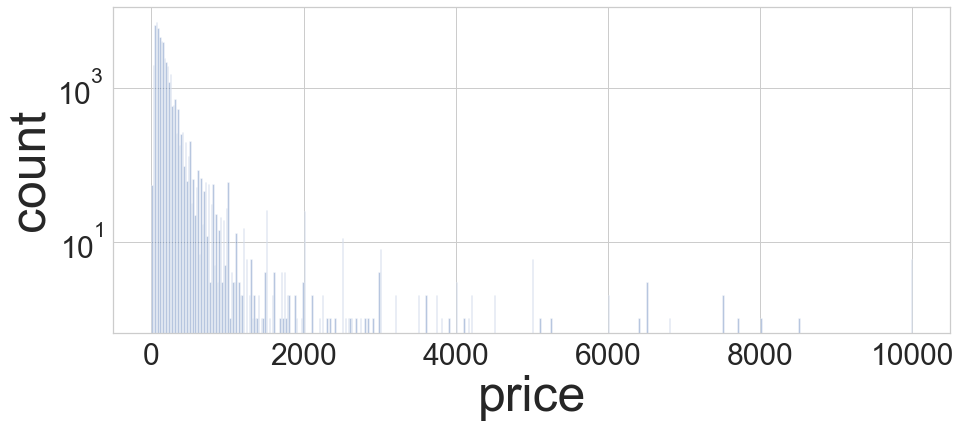

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
g = sns.distplot(df.price, kde=False, bins=500)
plt.ylabel("count", fontdict={"size": 50})
plt.xlabel("price", fontdict={"size": 50})
g.tick_params(labelsize=30)
g.set_yscale("log")

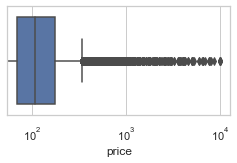

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(4, 2))
g = sns.boxplot(x=df.price)
g.set_xscale("log")

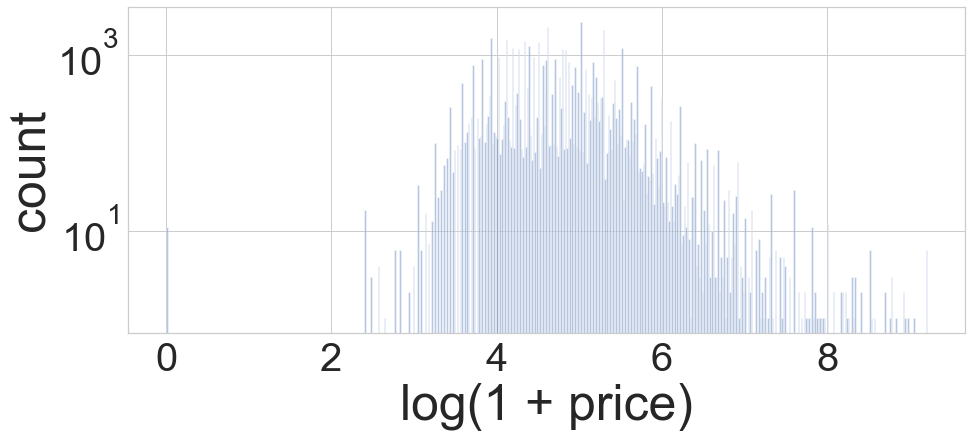

In [17]:
plt.figure(figsize=(15, 6))
g = sns.distplot(np.log1p(df.price), kde=False, bins=500)
plt.ylabel("count", fontdict={"size": 50})
plt.xlabel("log(1 + price)", fontdict={"size": 50})
g.tick_params(labelsize=40)
g.set_yscale("log")

# Neighbourhood group

In [18]:
df.groupby(by="neighbourhood_group")["price"].describe()

count        mean         std   min   25%    50%  \
neighbourhood_group                                                       
Bronx                 1091.0   87.496792  106.709349   0.0  45.0   65.0   
Brooklyn             20104.0  124.383207  186.873538   0.0  60.0   90.0   
Manhattan            21661.0  196.875814  291.383183   0.0  95.0  150.0   
Queens                5666.0   99.517649  167.102155  10.0  50.0   75.0   
Staten Island          373.0  114.812332  277.620403  13.0  50.0   75.0   

                       75%      max  
neighbourhood_group                  
Bronx                 99.0   2500.0  
Brooklyn             150.0  10000.0  
Manhattan            220.0  10000.0  
Queens               110.0  10000.0  
Staten Island        110.0   5000.0

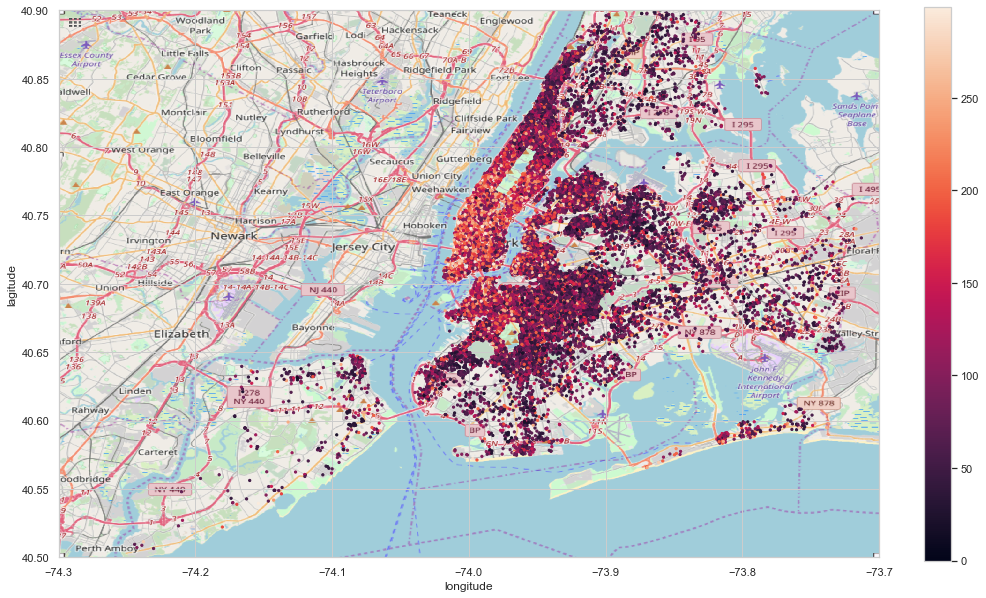

In [19]:
nyc_map = plt.imread('https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png')
bounding_box = (-74.3, -73.7, 40.5, 40.9)
plt.figure(figsize=(16, 16))
plt.imshow(nyc_map, zorder=0, extent=bounding_box)
drop = (df["latitude"] >= 40.8995) | (df["latitude"] <= 40.500001) | (df["price"] >= 300)
points = plt.scatter(df[~drop].longitude, df[~drop].latitude, c=df[~drop].price, s=5)
ax = plt.colorbar(points, fraction=0.031)
plt.xlabel("longitude")
plt.ylabel("lagitude")
plt.ioff()

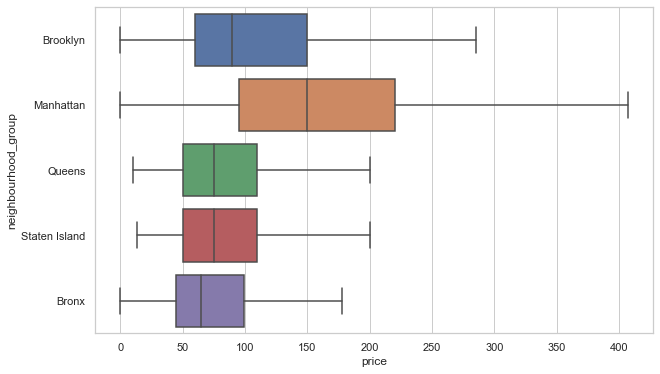

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="price", y="neighbourhood_group", data=df, showfliers=False)

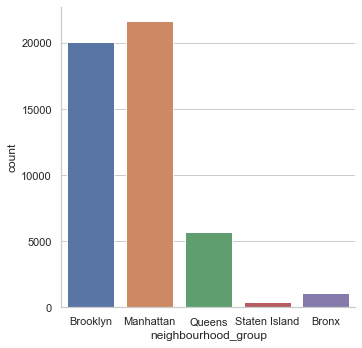

In [21]:
sns.catplot(x="neighbourhood_group", kind="count" ,data=df)

# Room type

In [22]:
df.groupby(by="room_type")["price"].describe()

count        mean         std  min    25%    50%    75%  \
room_type                                                                    
Entire home/apt  25409.0  211.794246  284.041611  0.0  120.0  160.0  229.0   
Private room     22326.0   89.780973  160.205262  0.0   50.0   70.0   95.0   
Shared room       1160.0   70.127586  101.725252  0.0   33.0   45.0   75.0   

                     max  
room_type                 
Entire home/apt  10000.0  
Private room     10000.0  
Shared room       1800.0

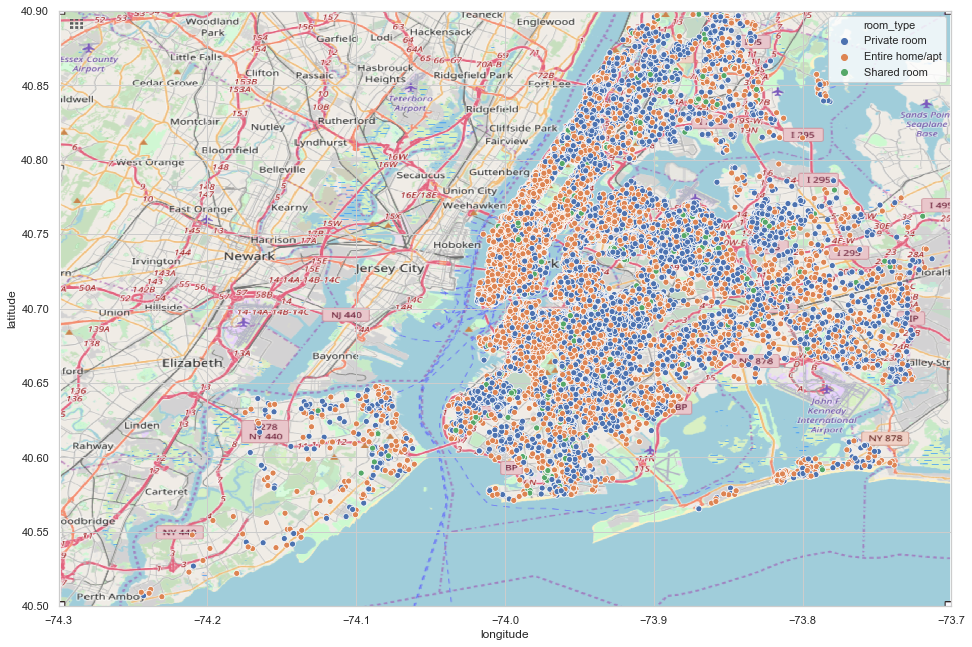

In [23]:
nyc_map = plt.imread('https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png')
bounding_box = (-74.3, -73.7, 40.5, 40.9)
plt.figure(figsize=(16, 16))
plt.imshow(nyc_map, zorder=0, extent=bounding_box)
drop = (df["latitude"] >= 40.8995) | (df["latitude"] <= 40.500001)
sns.scatterplot(df[~drop].longitude, df[~drop].latitude, hue=df[~drop].room_type)
plt.ioff()

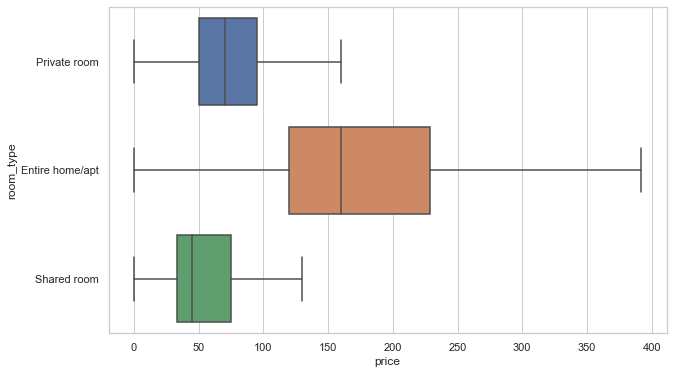

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="price", y="room_type", data=df, showfliers=False)

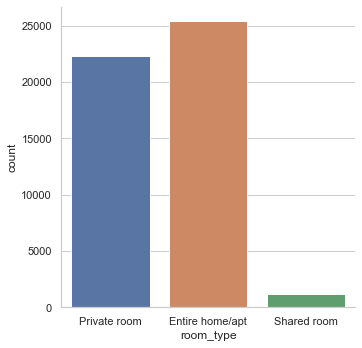

In [25]:
sns.catplot(x="room_type", kind="count" ,data=df)

# Host id

## Most of hosts own one listing

In [26]:
print("unique host:", len(df["host_id"].unique()))

unique host: 37457


# Availability 365

Text(0, 0.5, 'count')

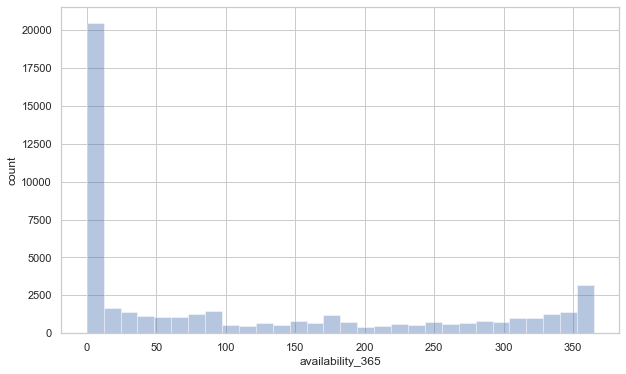

In [27]:
plt.figure(figsize=(10, 6))
sns.distplot(df["availability_365"], rug=False, kde=False)
plt.ylabel("count")

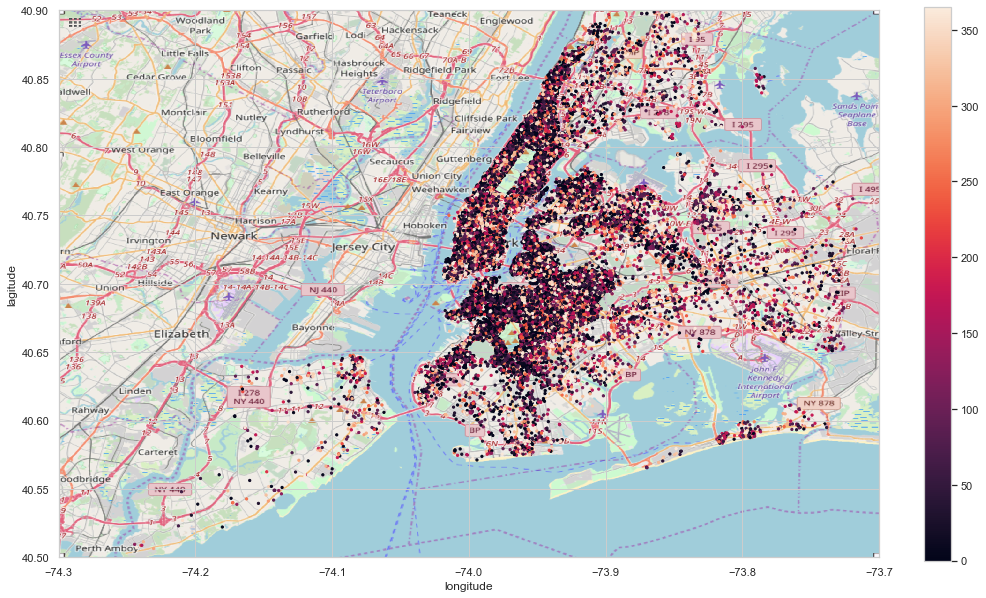

In [28]:
nyc_map = plt.imread('https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png')
bounding_box = (-74.3, -73.7, 40.5, 40.9)
plt.figure(figsize=(16, 16))
plt.imshow(nyc_map, zorder=0, extent=bounding_box)
drop = (df["latitude"] >= 40.8995) | (df["latitude"] <= 40.500001)
points = plt.scatter(df[~drop].longitude, df[~drop].latitude, c=df[~drop].availability_365, s=5)
ax = plt.colorbar(points, fraction=0.031)
plt.xlabel("longitude")
plt.ylabel("lagitude")
plt.ioff()

# Number of reviews

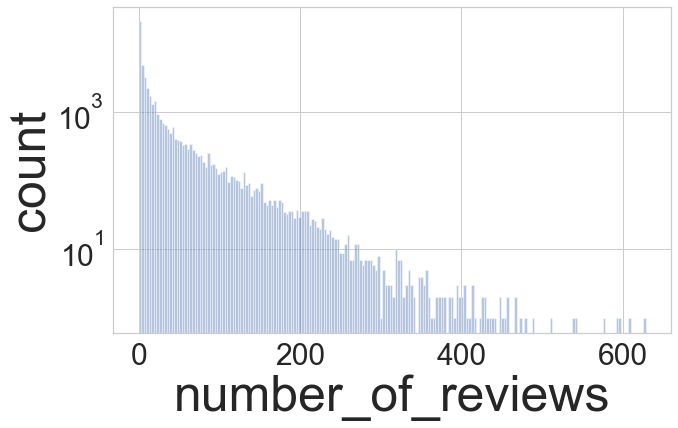

In [29]:
plt.figure(figsize=(10, 6))
g = sns.distplot(df["number_of_reviews"], rug=False, kde=False, bins=200)
plt.ylabel("count", fontdict={"size": 50})
plt.xlabel("number_of_reviews", fontdict={"size": 50})
g.tick_params(labelsize=30)
g.set_yscale("log")

# Reviews per month

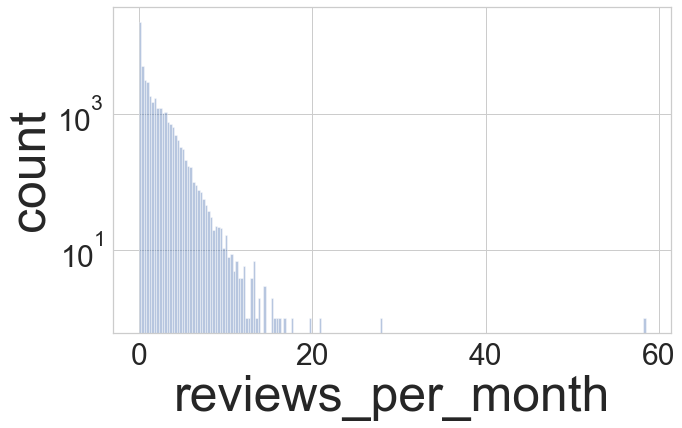

In [30]:
plt.figure(figsize=(10, 6))
g = sns.distplot(df["reviews_per_month"], rug=False, kde=False, bins=200)
plt.ylabel("count", fontdict={"size": 50})
plt.xlabel("reviews_per_month", fontdict={"size": 50})
g.tick_params(labelsize=30)
g.set_yscale("log")

# Minimum nights

Text(0, 0.5, 'count')

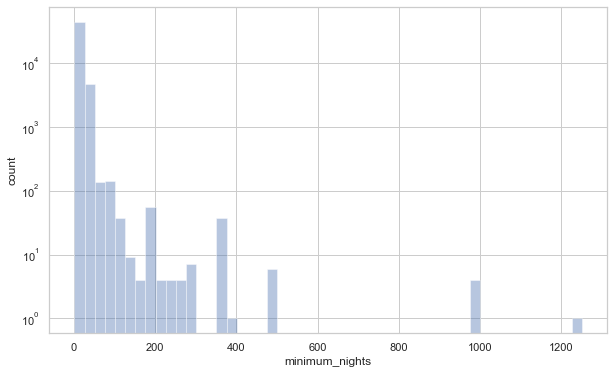

In [31]:
plt.figure(figsize=(10, 6))
g = sns.distplot(df["minimum_nights"], rug=False, kde=False)
g.set_yscale("log")
plt.ylabel("count")

# Model

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [33]:
def prepare_data():
  neighbourhood_group = pd.get_dummies(df["neighbourhood_group"], prefix="neighbourhood_group")
  room_type = pd.get_dummies(df["room_type"], prefix="room_type")
  X, y = df.drop(["id", "price", "name", "host_id", "host_name", "neighbourhood", "room_type", "neighbourhood_group", "last_review", "calculated_host_listings_count"], axis=1), np.log1p(df["price"])
  X = pd.concat([X, neighbourhood_group, room_type], axis=1)
  return X, y

X, y = prepare_data()
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=2019)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, random_state=2019)
print(len(X_train), len(X_valid), len(X_test))
X_train

39116 4889 4890


latitude  longitude  minimum_nights  number_of_reviews  \
2383   40.73135  -73.95489               7                116   
30418  40.72062  -73.98425               1                 46   
29894  40.58198  -73.95770               1                 67   
39543  40.75568  -73.99661               1                  1   
2204   40.71132  -73.94493               2                 39   
...         ...        ...             ...                ...   
37054  40.68129  -73.84235               1                  1   
32472  40.70335  -74.00860              29                  0   
12069  40.69470  -73.93481               4                100   
26994  40.68486  -73.98487               7                  2   
40008  40.82584  -73.95024               1                  2   

       reviews_per_month  availability_365  neighbourhood_group_Bronx  \
2383                1.57               308                          0   
30418               2.88               106                          0   
29894               3.83               186                          0   
39543               0.16               189                          0   
2204                0.58                88                          0   
...                  ...               ...                        ...   
37054               0.12               173                          0   
32472               0.00               220                          0   
12069               2.34               113                          0   
26994               0.11               246                          0   
40008               0.76                89                          0   

       neighbourhood_group_Brooklyn  neighbourhood_group_Manhattan  \
2383                              1                              0   
30418                             0                              1   
29894                             1                              0   
39543                             0                              1   
2204                              1                              0   
...                             ...                            ...   
37054                             0                              0   
32472                             0                              1   
12069                             1                              0   
26994                             1                              0   
40008                             0                              1   

       neighbourhood_group_Queens  neighbourhood_group_Staten Island  \
2383                            0                                  0   
30418                           0                                  0   
29894                           0                                  0   
39543                           0                                  0   
2204                            0                                  0   
...                           ...                                ...   
37054                           1                                  0   
32472                           0                                  0   
12069                           0                                  0   
26994                           0                                  0   
40008                           0                                  0   

       room_type_Entire home/apt  room_type_Private room  \
2383                           0                       1   
30418                          1                       0   
29894                          0                       1   
39543                          0                       1   
2204                           1                       0   
...                          ...                     ...   
37054                          0                       1   
32472                          1                       0   
12069                          0                       1   
26994                          1           

In [34]:
def evaluate(model, X, y):
  y_pred = model.predict(X)
  mse = mean_squared_error(y, y_pred)
  mae = mean_absolute_error(y, y_pred)
  r2 = r2_score(y, y_pred)
  print("mse: ", mse)
  print("mae: ", mae)
  print("r2: ", r2)

# Baseline: predict mean price

In [35]:
from sklearn.base import BaseEstimator, RegressorMixin

class Baseline(BaseEstimator, RegressorMixin):
  def fit(self, X, y):
    self.y_pred = np.mean(y)
    return self
  
  def predict(self, X):
    return np.full((X.shape[0],), self.y_pred)

model = Baseline()
model.fit(X_train, y_train)
print("Train")
evaluate(model, X_train, y_train)
print("Valid")
evaluate(model, X_valid, y_valid)
print("Test")
evaluate(model, X_test, y_test)

Train
mse:  0.4824059547372613
mae:  0.5480447885614379
r2:  -2.220446049250313e-16
Valid
mse:  0.48094703418608126
mae:  0.548298515686941
r2:  -0.0005123529374735369
Test
mse:  0.49476181465055846
mae:  0.5589867074502175
r2:  -4.792558909283429e-06


# Linear Regression

In [36]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Train")
evaluate(model, X_train, y_train)
print("Valid")
evaluate(model, X_valid, y_valid)
print("Test")
evaluate(model, X_test, y_test)

Train
mse:  0.2482924371435999
mae:  0.36014746351810883
r2:  0.4853039546768644
Valid
mse:  0.2531586129837065
mae:  0.36407213564506624
r2:  0.4733550650304734
Test
mse:  0.23590200288687388
mae:  0.35273728170791324
r2:  0.5231985847013401


In [37]:
print(X_train.columns)
print(model.coef_)
print(model.coef_.argmax())

Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'availability_365', 'neighbourhood_group_Bronx',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')
[-6.78083252e-01 -3.02392997e+00 -1.91187897e-03 -6.27463929e-04
 -6.72779212e-03  7.36844260e-04  1.19887828e-01  5.70189239e-02
  3.62087757e-01  1.90376780e-01 -7.29371289e-01  6.26597288e-01
 -1.18400075e-01 -5.08197213e-01]
11


# Random Forest

In [38]:
model = RandomForestRegressor(n_estimators=1000, random_state=2019, max_depth=10, n_jobs=-1)
model.fit(X_train, y_train)
print("Train")
evaluate(model, X_train, y_train)
print("Valid")
evaluate(model, X_valid, y_valid)
print("Test")
evaluate(model, X_test, y_test)

Train
mse:  0.15910889854005342
mae:  0.29000413537104514
r2:  0.6701763380455972
Valid
mse:  0.2063627081637828
mae:  0.3211659079539868
r2:  0.5707044143584183
Test
mse:  0.19797139540124542
mae:  0.3179854299112536
r2:  0.5998633315494556


In [39]:
for n_estimators in [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
  print("n_estimators: ", n_estimators)
  model = RandomForestRegressor(n_estimators=n_estimators, random_state=2019, max_depth=10, n_jobs=-1)
  model.fit(X_train, y_train)
  print("Train")
  evaluate(model, X_train, y_train)
  print("Valid")
  evaluate(model, X_valid, y_valid)
  print("Test")
  evaluate(model, X_test, y_test)http://localhost:8888/notebooks/ISE-529/Angelo%20Project/Copy_of_airbnb.ipynb#
  print("=" * 80)

n_estimators:  100
Train
mse:  0.15947123918157843
mae:  0.2902592673293422
r2:  0.6694252265844578
Valid
mse:  0.20661197714552143
mae:  0.3214413843485719
r2:  0.5701858610090756
Test
mse:  0.19794856954576495
mae:  0.31803662742115485
r2:  0.5999094668092892
n_estimators:  200
Train
mse:  0.15934717465854753
mae:  0.29018461235960014
r2:  0.6696824052569277
Valid
mse:  0.20638889233996782
mae:  0.3210246418000331
r2:  0.5706499435126444
Test
mse:  0.19743907362613694
mae:  0.31763967754124717
r2:  0.600939251942924
n_estimators:  300
Train
mse:  0.1592390044856079
mae:  0.2901297145498072
r2:  0.6699066358491859
Valid
mse:  0.20646724626726823
mae:  0.3210858911180243
r2:  0.5704869441247848
Test
mse:  0.19764269725170064
mae:  0.31780367926795333
r2:  0.6005276910758313
n_estimators:  400
Train
mse:  0.15913081888618752
mae:  0.29004602687047054
r2:  0.6701308984196579
Valid
mse:  0.20624928498018588
mae:  0.3210014964680026
r2:  0.5709403681916514
Test
mse:  0.19777573600321832
ma

In [40]:
model = RandomForestRegressor(n_estimators=800, random_state=2019, max_depth=10, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=-1,
                      oob_score=False, random_state=2019, verbose=0,
                      warm_start=False)

Text(0.5, 0, 'Importance')

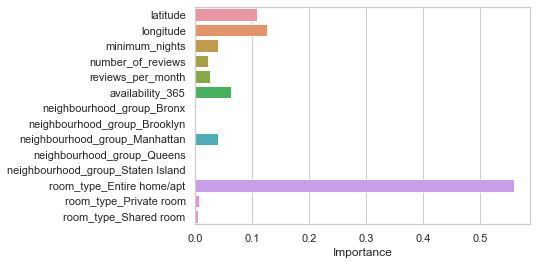

In [41]:
g = sns.barplot(x=model.feature_importances_, y=X_train.columns)
g.set_xlabel("Importance")

# Gradient Boosting

In [42]:
for min_samples_leaf in [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]:
  print("min_samples_leaf: ", min_samples_leaf)
  model = GradientBoostingRegressor(n_estimators=200, random_state=2019, max_depth=10, min_samples_leaf=min_samples_leaf)
  model.fit(X_train, y_train)
  print("Train")
  evaluate(model, X_train, y_train)
  print("Valid")
  evaluate(model, X_valid, y_valid)
  print("Test")
  evaluate(model, X_test, y_test)

min_samples_leaf:  1
Train
mse:  0.05993949826949179
mae:  0.17971431167351767
r2:  0.8757488424823914
Valid
mse:  0.2109860552492356
mae:  0.3223402804945197
r2:  0.5610864823573589
Test
mse:  0.1989637694450001
mae:  0.3173676772220691
r2:  0.5978575607515078
min_samples_leaf:  5
Train
mse:  0.08434219027292933
mae:  0.20472909921284818
r2:  0.825163455291787
Valid
mse:  0.2033929706013915
mae:  0.31915343777186544
r2:  0.5768823485277875
Test
mse:  0.19545481502481302
mae:  0.3139684826025689
r2:  0.6049498041970456
min_samples_leaf:  10
Train
mse:  0.1050269519671046
mae:  0.22865842560237368
r2:  0.7822851253477857
Valid
mse:  0.2002581853920321
mae:  0.3165107227511008
r2:  0.5834036307123789
Test
mse:  0.19327874117434377
mae:  0.3133129792228677
r2:  0.609348050413699
min_samples_leaf:  15
Train
mse:  0.1124251414848749
mae:  0.23726498924278389
r2:  0.7669491008955177
Valid
mse:  0.20090108533823628
mae:  0.3170737648488824
r2:  0.5820662083099959
Test
mse:  0.1939148672146342

In [43]:
for n_estimators in [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
  print("n_estimators: ", n_estimators)
  model = GradientBoostingRegressor(n_estimators=n_estimators, random_state=2019, max_depth=10, min_samples_leaf=100)
  model.fit(X_train, y_train)
  print("Train")
  evaluate(model, X_train, y_train)
  print("Valid")
  evaluate(model, X_valid, y_valid)
  print("Test")
  evaluate(model, X_test, y_test)
  print("=" * 80)

n_estimators:  100
Train
mse:  0.1640871565796447
mae:  0.2866412147074752
r2:  0.6598566933755751
Valid
mse:  0.20013941189893078
mae:  0.31542620296764984
r2:  0.5836507147748693
Test
mse:  0.19125445136622557
mae:  0.3124751899342207
r2:  0.6134395131129295
n_estimators:  200
Train
mse:  0.1566731669028493
mae:  0.2800733336775643
r2:  0.6752254706553525
Valid
mse:  0.2002226940529896
mae:  0.31533792278429856
r2:  0.5834774632149422
Test
mse:  0.19066677727984954
mae:  0.31202342077840123
r2:  0.6146273107267243
n_estimators:  300
Train
mse:  0.15176125416625344
mae:  0.27558022430135615
r2:  0.6854075853004156
Valid
mse:  0.20084898356875905
mae:  0.315932437175962
r2:  0.5821745954301287
Test
mse:  0.19099433729212476
mae:  0.3123457011472748
r2:  0.6139652515854843
n_estimators:  400
Train
mse:  0.14754143914167994
mae:  0.27190825229173016
r2:  0.6941550209055001
Valid
mse:  0.20127721143832997
mae:  0.3165913410161166
r2:  0.5812837545621674
Test
mse:  0.19123105681172653
mae:

In [44]:
model = GradientBoostingRegressor(n_estimators=100, random_state=2019, max_depth=10, min_samples_leaf=100)
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=100, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=2019, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Text(0.5, 0, 'Importance')

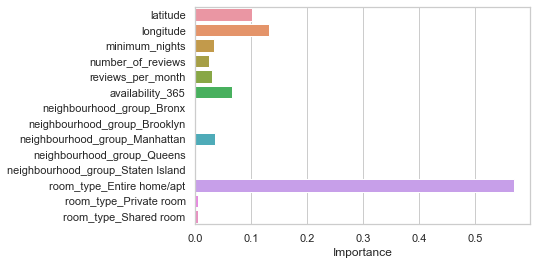

In [45]:
g = sns.barplot(x=model.feature_importances_, y=X_train.columns)
g.set_xlabel("Importance")